# Exercise 1
1A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [tv_data, radio_data, newspaper_data]
    Y = sales_data
    return X, Y

def main():
    file_name_dataset = 'advertising.csv'
    X, y = prepare_data(file_name_dataset)
    list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5]) ]

    print(list)

if __name__ == '__main__':
    main()


[624.1, 175.10000000000002, 300.5, 78.9]


---
# Excersice 2

In [2]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

In [3]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1*x1 + w2*x2 + w3*x3 +b
    return result

In [4]:
def compute_loss_mse(y, y_hat):
    loss_mse = (y - y_hat)**2
    return loss_mse

In [5]:
def compute_gradient_wi(x, y, y_hat):
    gradient_wi = 2*x*(y_hat - y)
    return gradient_wi

In [6]:
def compute_gradient_b(b, y, y_hat):
    gradient_b = 2*(y_hat - y)
    return gradient_b

In [7]:
def update_weight_wi(wi, dl_dw, lr):
    return wi - lr*dl_dw

In [8]:
def update_weight_b(b, dl_db, lr):
    return b - lr*dl_db

In [9]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            #get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            #compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            #compute_loss
            loss = compute_loss_mse(y, y_hat)

            #compute_gradient w1, w2, w3
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(b, y, y_hat)

            #update parameter
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            #logging
            losses.append(loss)

    return (w1, w2, w3, b, losses)


<function matplotlib.pyplot.show(close=None, block=None)>

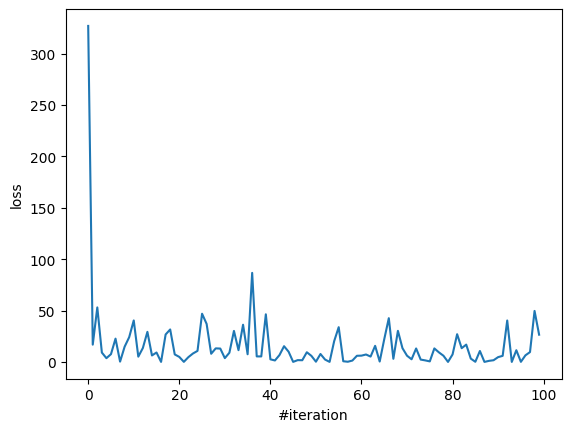

In [11]:
X, y = prepare_data("advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("loss")
plt.show